# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
import numpy as np
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [415]:
adver_data.head(5)

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
print('\nX shape:', X.shape)

y = adver_data[['Sales']].values
print('\ny shape:', y.shape)
print(y[:5])
#print(type(y))
#print(y.T)


X shape: (200, 3)

y shape: (200, 1)
[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]]


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

### Population vs Sample in standart deviation
 - **Population** std if the data contains **all measurable values**, or all of the values you are interested in. 
 - **Sample** std if the data is a **sample of a large or unlimited population** and you wish to make a statement about the entire population.

In [20]:
mean = np.mean(X, axis=0)
mean

std = np.std(X, axis=0)
print (mean, std )

[147.0425  23.264   30.554    1.    ] [85.63933176 14.80964564 21.72410606  0.        ]


In [139]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
X[:5]
print('mean =', mean )
print('std =', std )
for el in X:
    el[0] = (el[0] - mean[0])/std[0]
    el[1] = (el[1] - mean[1])/std[1]
    el[2] = (el[2] - mean[2])/std[2]
print(X[:5])

mean = [147.0425  23.264   30.554 ]
std = [85.63933176 14.80964564 21.72410606]
[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [10]:
c = np.ones((X.shape[0],1))
print(c[:5])
print('shape of c:', c.shape) 
X = np.hstack((X,c))
X[:5]

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
shape of c: (200, 1)


array([[230.1,  37.8,  69.2,   1. ],
       [ 44.5,  39.3,  45.1,   1. ],
       [ 17.2,  45.9,  69.3,   1. ],
       [151.5,  41.3,  58.5,   1. ],
       [180.8,  10.8,  58.4,   1. ]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [77]:
print('\nThe following are identical:\n\n X[1] @ w =', X[1] @ w)
print('\n np.dot(X[1],w) =', np.dot(X[1],w))
train_ind=1
print('\n w[0]·X[1,0]+w[1]·X[1,1]+w[2]·X[1,2]+w[3]·X[1,3] =',\
      w[0]*X[1, 0]+w[1]*X[1, 1]+w[2]*X[1, 2]+w[3]*X[1, 3])


The following are identical:

 X[1] @ w = [11.80810892]

 np.dot(X[1],w) = [11.80810892]

 w[0]·X[1,0]+w[1]·X[1,1]+w[2]·X[1,2]+w[3]·X[1,3] = [11.80810892]


In [13]:
def mserror(y, y_pred):    
    return (sum((y - y_pred)**2)/y.shape[0] )

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [22]:
med = np.array([np.median(y)] * X.shape[0]) 
med = med.reshape(y.shape[0],1)
print('\nmedian=', med[0], '\nmed array shape:', med.shape)
print(med[:5]) 
MSE_med = mserror(y, med)
print('MSE value if median values predicted: ', round(MSE_med, 3))
with open('1.txt', 'w') as f:
    f.write(str(round(MSE_med ,3)))


median= [12.9] 
med array shape: (200, 1)
[[12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]]
MSE value if median values predicted:  28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [71]:
def normal_equation(X, y): 
    # np.linalg.inv(X.T @ X) @ X.T @ y
    a = np.linalg.inv(X.T @ X) 
    b = a @ X.T  
    return b @ y 

norm_eq_weights = normal_equation(X, y)
print('\nWeights calculated thru inv():', norm_eq_weights)

# anoter way to calculate Linear regression weights
norm_eq_weights2 = np.linalg.pinv(X) @ y 
print('\nWeights calculated thru pinv():', np.around( norm_eq_weights2, 4))


Weights calculated thru inv(): [[ 4.57646455e-02]
 [ 1.88530017e-01]
 [-1.03749304e-03]
 [ 2.93888937e+00]]

Weights calculated thru pinv(): [[ 4.5800e-02]
 [ 1.8850e-01]
 [-1.0000e-03]
 [ 2.9389e+00]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [470]:
answer2 = np.array([0,0,0,1]) @ norm_eq_weights  
print(round(answer2.item(), 3))
with open('2.txt', 'w') as f:
    f.write(str(round(answer2.item() ,3)))

14.023


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [33]:
N=10
print('y=', y[:N])
print('norm_eq_weights.shape:', norm_eq_weights.shape)
def linear_prediction(X, w):
    return np.dot(X, w) # the same as "X @ w" for 2D case
y_pred = linear_prediction(X, norm_eq_weights) 
yy = np.hstack((y,y_pred))
df = pd.DataFrame(yy[:N])
df.columns =['Sales', 'Linear prediction of Sales']
print( df.head(N) )

y= [[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]]
norm_eq_weights.shape: (4, 1)
   Sales  Linear prediction of Sales
0   22.1                   20.523974
1   10.4                   12.337855
2    9.3                   12.307671
3   18.5                   17.597830
4   12.9                   13.188672
5    7.2                   12.478348
6   11.8                   11.729760
7   13.2                   12.122953
8    4.8                    3.727341
9   10.6                   12.550849


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [34]:
answer3 = mserror(y , y_pred)
print('MSE:', round(answer3, 3))
with open('3.txt', 'w') as f:
    f.write(str(round(answer3 ,3)))

MSE: 2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [48]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = X[train_ind][0] * ( X[train_ind] @ w  - y[train_ind])
    grad1 = X[train_ind][1] * ( X[train_ind] @ w  - y[train_ind])
    grad2 = X[train_ind][2] * ( X[train_ind] @ w  - y[train_ind])
    grad3 = X[train_ind][3] * ( X[train_ind] @ w  - y[train_ind])
    return  w - 2 * eta / X.shape[0] * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [85]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-3, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        prev_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w - prev_w)
        errors.append(mserror(y, X @ w))
        iter_num +=1 
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [55]:
np.zeros((4, 1))

array([[0.],
       [0.],
       [0.],
       [0.]])

In [86]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros((4, 1)))
len(stoch_errors_by_iter)

Wall time: 15.9 s


100000

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


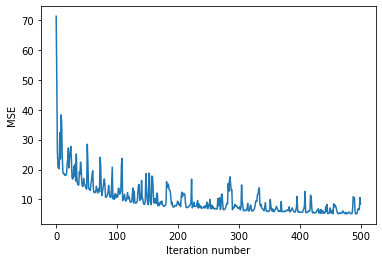

In [60]:
%pylab inline
plot(range(500), stoch_errors_by_iter[:500])
plt.rcParams["figure.figsize"] = [8,5]
xlabel('Iteration number')
ylabel('MSE')
plt.savefig(
    'linear-regression-SGD-50.png',
    format='png',
    dpi=72
)

Populating the interactive namespace from numpy and matplotlib


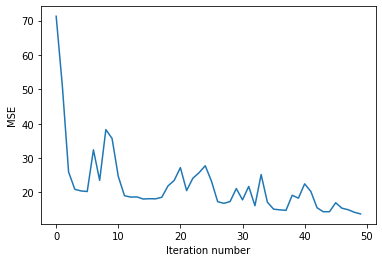

In [73]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')
plt.savefig(
    'linear-regression-SGD-50-2.png',
    format='png',
    dpi=72
)

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

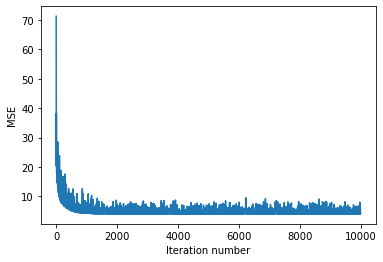

In [61]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')
plt.savefig(
    'linear-regression-SGD-50.png',
    format='png',
    dpi=72
)

**Посмотрим на вектор весов, к которому сошелся метод.**
**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [87]:
print('Linear regression model weights vector:\n', stoch_grad_desc_weights, '\n')
print('MSE at the last iteration:', round(stoch_errors_by_iter[-1], 3))

Linear regression model weights vector:
 [[0.04464799]
 [0.22103804]
 [0.01670049]
 [0.397333  ]] 

MSE at the last iteration: 5.277


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [88]:
round(mserror(y , X @ stoch_grad_desc_weights), 3)
#print(answer4 , 3))
#with open('4.txt', 'w') as f:
#    f.write(str(round(answer4 ,3)))

5.277